In [1]:
import os
from hydromt_sfincs import SfincsModel

In [2]:
# !hydromt --models

In [3]:
modelname = 'sfincs_test_CLI'

In [4]:
dir_run = os.path.join('..','computations',modelname)

In [6]:
!hydromt build sfincs ../computations/sfincs_test_CLI --region "{'bbox': [34.33,-20.12,34.95,-19.30]}" -i sfincs_base_build.yml --force-overwrite -v

# can the folder name in the command above be written based on the variable modelname?

# For more information on command line available options, type:
# !hydromt build --help

2024-10-28 18:38:37,400 - build - log - INFO - HydroMT version: 0.10.0
2024-10-28 18:38:37,400 - build - main - INFO - Building instance of sfincs model at C:\Users\aleksand\git_projects\COMPASS\SFINCS\sfincs_sofala\computations\sfincs_test_CLI.
2024-10-28 18:38:37,401 - build - main - INFO - User settings:
2024-10-28 18:38:37,674 - build - data_catalog - INFO - Parsing data catalog from C:\Users\aleksand\git_projects\COMPASS\SFINCS\datacatalog.yml
2024-10-28 18:38:38,159 - build - model_api - WARNING - Model dir already exists and files might be overwritten: C:\Users\aleksand\git_projects\COMPASS\SFINCS\sfincs_sofala\computations\sfincs_test_CLI\gis.
2024-10-28 18:38:38,159 - build - model_api - INFO - Initializing sfincs model from hydromt_sfincs (v1.1.0).
2024-10-28 18:38:38,160 - build - model_api - INFO - setup_grid_from_region.region: {'bbox': [34.33, -20.12, 34.95, -19.3]}
2024-10-28 18:38:38,161 - build - model_api - INFO - setup_grid_from_region.res: 100
2024-10-28 18:38:38,16

The nodata value None is not in the reclass table.None will be used for the params.


In [7]:
#  create a bat file to run the model on windows
batch_content = 'call "p:/11210471-001-compass/02_Models/00_executables/SFINCS_v2.1.1_Dollerup_release_exe/sfincs.exe" > sfincs_log.txt'

file_name = 'run_sfincs.bat'
with open(os.path.join(dir_run, file_name), "w") as file:
    file.write(batch_content)

In [7]:
dir_list = os.listdir(dir_run)
print(dir_list)

['gis', 'hydromt.log', 'hydromt_data.yml', 'sfincs.dep', 'sfincs.ind', 'sfincs.inp', 'sfincs.msk']


In [8]:
# read the model with hydromt methods
sf = SfincsModel(root=dir_run, mode="r")
sf.read()

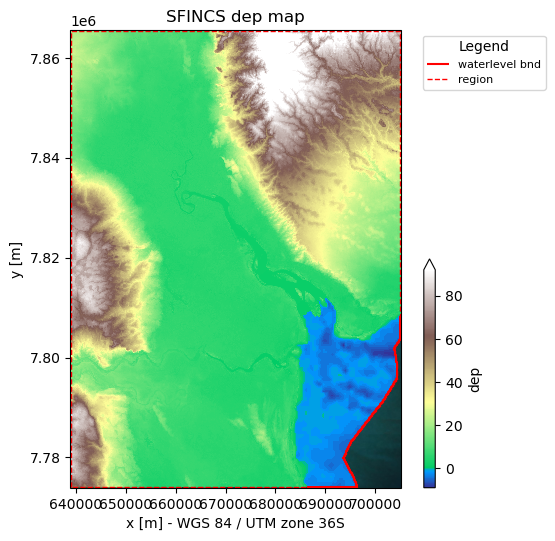

In [9]:
# plot the model with satelite basemap (see hydromt_sfincs.plot_basemap for more options)
_ = sf.plot_basemap(plot_region=True, bmap="sat", zoomlevel=12)

In [13]:
!hydromt update sfincs ../computations/sfincs_test_CLI -i sfincs_Idai_forcing.yml -v

# this does not work, see error below related to the update of the data catalog?

2024-10-28 18:16:30,538 - update - log - INFO - HydroMT version: 0.10.0
2024-10-28 18:16:30,539 - update - main - INFO - Updating sfincs model at C:\Users\aleksand\git_projects\COMPASS\SFINCS\sfincs_sofala\computations\sfincs_test_CLI (r+).
2024-10-28 18:16:30,539 - update - main - INFO - Output dir: C:\Users\aleksand\git_projects\COMPASS\SFINCS\sfincs_sofala\computations\sfincs_test_CLI
2024-10-28 18:16:30,540 - update - main - INFO - User settings:
2024-10-28 18:16:30,731 - update - data_catalog - INFO - Parsing data catalog from C:\Users\aleksand\git_projects\COMPASS\SFINCS\datacatalog.yml
2024-10-28 18:16:31,379 - update - model_api - WARNING - Model dir already exists and files might be overwritten: C:\Users\aleksand\git_projects\COMPASS\SFINCS\sfincs_sofala\computations\sfincs_test_CLI\gis.
2024-10-28 18:16:31,379 - update - model_api - INFO - Initializing sfincs model from hydromt_sfincs (v1.1.0).
2024-10-28 18:16:31,469 - update - model_api - INFO - setup_precip_forcing_from_gr

Traceback (most recent call last):
  File "C:\Users\aleksand\git_projects\COMPASS\.pixi\envs\compass-sfincs\Scripts\hydromt-script.py", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "C:\Users\aleksand\git_projects\COMPASS\.pixi\envs\compass-sfincs\Lib\site-packages\click\core.py", line 1157, in __call__
    return self.main(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\aleksand\git_projects\COMPASS\.pixi\envs\compass-sfincs\Lib\site-packages\click\core.py", line 1078, in main
    rv = self.invoke(ctx)
         ^^^^^^^^^^^^^^^^
  File "C:\Users\aleksand\git_projects\COMPASS\.pixi\envs\compass-sfincs\Lib\site-packages\click\core.py", line 1688, in invoke
    return _process_result(sub_ctx.command.invoke(sub_ctx))
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\aleksand\git_projects\COMPASS\.pixi\envs\compass-sfincs\Lib\site-packages\click\core.py", line 1434, in invoke
    return ctx.invoke(self.callback, **ctx.